<a href="https://colab.research.google.com/github/FreeRikato/Deep-learning-lab/blob/main/ANN/Car_purchasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/car_purchasing.csv', encoding="ISO-8859-1")

In [ ]:
data.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
data = data.drop('customer name', axis = 1)
data = data.drop('customer e-mail', axis = 1)

In [ ]:
data.head(5)

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


<ipython-input-8-8a012883761e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr = data.corr()


<Axes: >

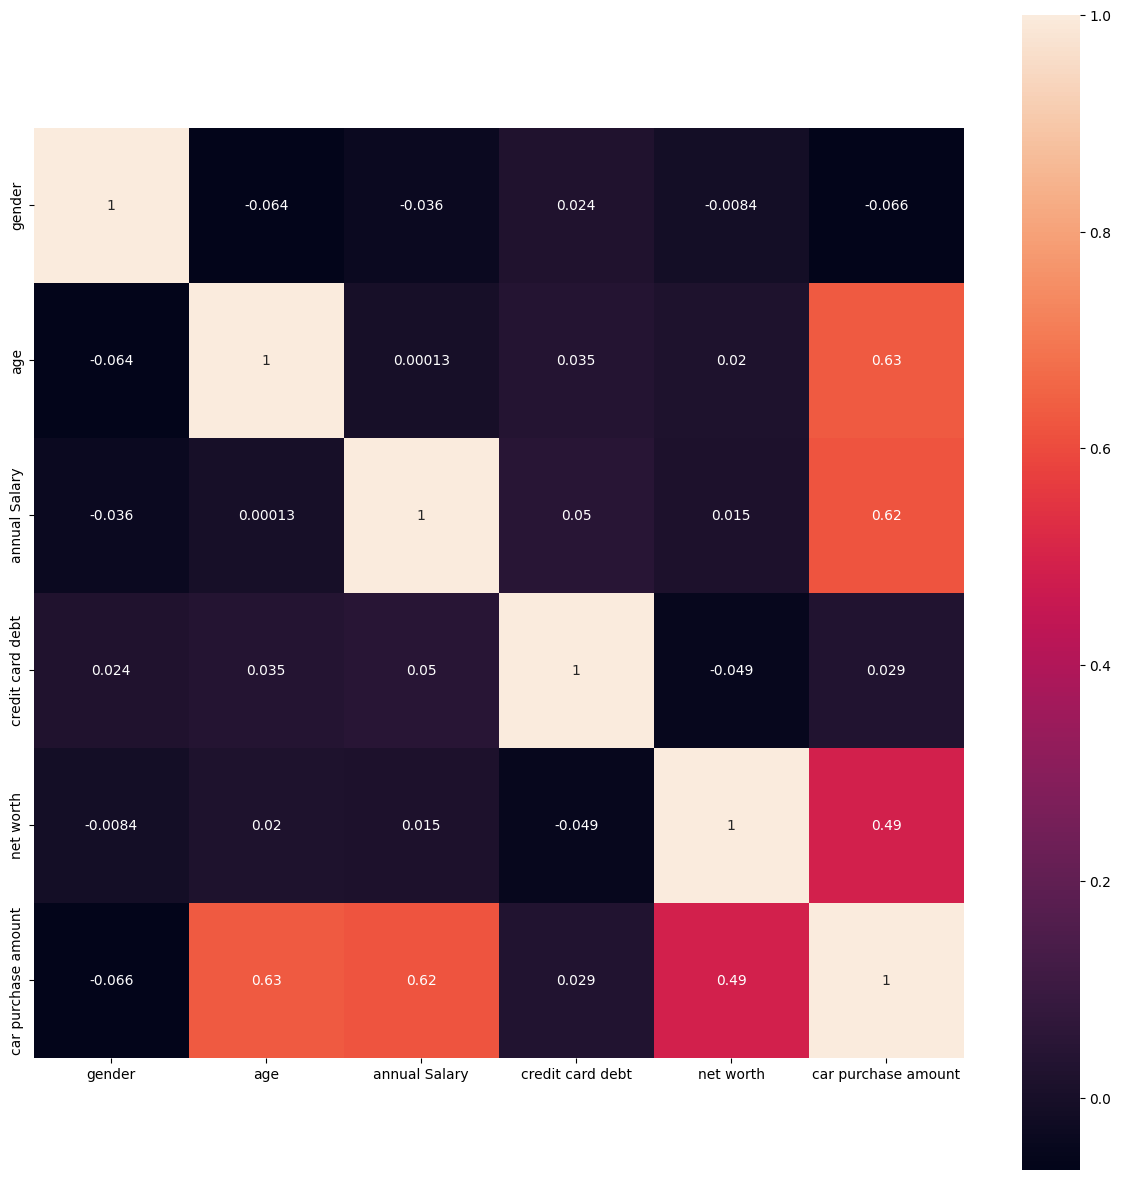

In [ ]:
datacorr = data.corr()
plt.subplots(figsize = (15, 15))
sns.heatmap(datacorr, annot = True, square = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cols = ['country']
enc = LabelEncoder()
data[cols] = data[cols].apply(enc.fit_transform)

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape

(400, 6)

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 6))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae', 'accuracy'])

In [ ]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 150, verbose = 1, restore_best_weights = True)
model.fit(x_train, y_train, epochs = 500, callbacks = [early_stopping], validation_split = 0.2, batch_size = 32)

Epoch 1/500
10/10 [==============================] - 3s 123ms/step - loss: 207745696.0000 - mse: 207745696.0000 - mae: 11563.6270 - accuracy: 0.0000e+00 - val_loss: 145520640.0000 - val_mse: 145520640.0000 - val_mae: 9319.9141 - val_accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 18ms/step - loss: 158459856.0000 - mse: 158459856.0000 - mae: 9796.6504 - accuracy: 0.0000e+00 - val_loss: 114917864.0000 - val_mse: 114917864.0000 - val_mae: 8168.6392 - val_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 22ms/step - loss: 134208296.0000 - mse: 134208296.0000 - mae: 8982.0098 - accuracy: 0.0000e+00 - val_loss: 98839056.0000 - val_mse: 98839056.0000 - val_mae: 7689.6001 - val_accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 12ms/step - loss: 113002176.0000 - mse: 113002176.0000 - mae: 8248.1094 - accuracy: 0.0000e+00 - val_loss: 82519848.0000 - val_mse: 82519848.0000 - val_mae: 7021.5493 - val_accuracy: 0.000

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 41733280.0000 - mse: 41733280.0000 - mae: 5182.8867 - accuracy: 0.0000e+00


[41733280.0, 41733280.0, 5182.88671875, 0.0]

In [ ]:
y_pred= model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
r2_score(y_test, y_pred)

0.613484682393866